# Fast Style Transfer (Using TF-Hub) Implementation on VQGAN+CLIP-Generated Image
### By: Michelle Juárez

This code has not been modified from the original in function or algorithm. This code has been implemented in Google Colab, and the only modifications made are: 

*   to mount a user's Google Drive to leverage read/write capabilities
*   to allow a user to manually input the Google Drive filepaths for the "content" and "style" images to be used
*   to allow the user to save and download the resulting image






In [ ]:
#@title Fast Style Transfer: Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [1]:
# @title Import Libraries

import os
import tensorflow as tf
# Load compressed models from tensorflow_hub
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import PIL.Image
import time
import functools

In [2]:
# @title Mount Local Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# @title Filepaths of "Content" and "Style" Images

content = '/content/drive/My Drive/Colab Notebooks/Datasets/Images/anne1.jpg' #@param {type:"string"}
style = '/content/drive/My Drive/Colab Notebooks/Datasets/Images/dali_clocks.jpg' #@param {type:"string"}

In [4]:
# @title Function Definitions

def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

def tensor_to_image(tensor):
  tensor = tensor * 255
  tensor = np.array(tensor, dtype = np.uint8)
  if np.ndim(tensor) > 3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

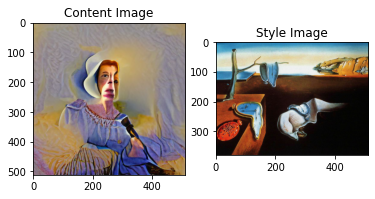

In [5]:
# @title Preview "Content" and "Style" Images

content_image = load_img(content)
style_image = load_img(style)

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

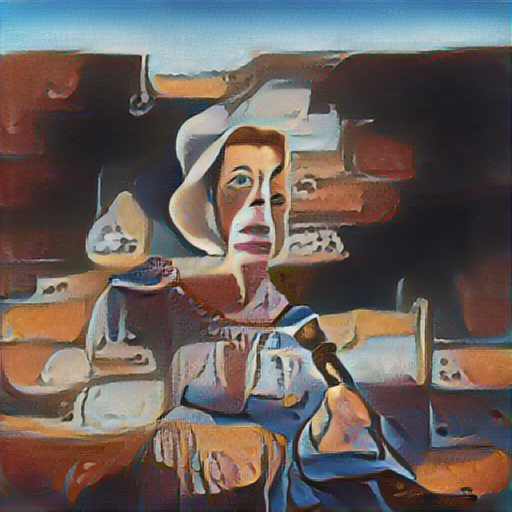

In [6]:
# @title Generate stylized image...

import tensorflow_hub as hub

hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
tensor_to_image(stylized_image)

In [7]:
# @title Save and Download Stylized Image
from google.colab import files
from PIL import Image

img_save_path = '/content/drive/My Drive/Colab Notebooks/Datasets/Images/dali1_anne1.jpg' #@param {type:"string"}
#tensor_to_image(stylized_image).save('/content/drive/My Drive/Colab Notebooks/Datasets/Images/jc04_cabin2.jpg')
tensor_to_image(stylized_image).save(img_save_path)
#img_jpg = Image.open('/content/drive/My Drive/Colab Notebooks/Datasets/Images/jc04_cabin2.jpg')
img_jpg = Image.open(img_save_path)

files.download(img_save_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
# @title Flush and Unmount Google Drive

drive.flush_and_unmount()
print('Drive unmounted')

Drive unmounted
